In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('data.csv')
data.head()

,Age,Experience,Income,Family,CCAvg
0,25,1,49,4,1.6
1,45,19,34,3,1.5
2,39,15,11,1,1.0
3,35,9,100,1,2.7
4,35,8,45,4,1.0


In [4]:
data.isnull().sum()

Age           0
Experience    0
Income        0
Family        0
CCAvg         0
dtype: int64

In [5]:
data.info

<bound method DataFrame.info of       Age  Experience  Income  Family  CCAvg
0      25           1      49       4    1.6
1      45          19      34       3    1.5
2      39          15      11       1    1.0
3      35           9     100       1    2.7
4      35           8      45       4    1.0
...   ...         ...     ...     ...    ...
2495   46          22      70       4    1.9
2496   63          37      32       3    0.7
2497   33           9      14       3    0.9
2498   38          14     111       2    6.1
2499   53          27      38       4    2.8

[2500 rows x 5 columns]>

In [6]:
data.describe()

,Age,Experience,Income,Family,CCAvg
count,2500.000000,2500.000000,2500.0000,2500.00000,2500.000000
mean,45.346000,20.120800,74.4472,2.40800,1.951284
std,11.519521,11.523824,46.6724,1.15986,1.795449
min,23.000000,-2.000000,8.0000,1.00000,0.000000
25%,35.000000,10.000000,39.0000,1.00000,0.700000
50%,45.000000,20.000000,64.0000,2.00000,1.500000
75%,55.000000,30.000000,99.2500,4.00000,2.500000
max,67.000000,42.000000,205.0000,4.00000,10.000000


In [7]:
y = data['Income']
X = data.drop(['Income'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1000)

## Linear Regression

In [8]:
lr = LinearRegression()
results1 = lr.fit(x_train, y_train)

In [9]:
lr.coef_

array([-3.07793956,  2.89401562, -3.37220023, 16.09065086])

## Ridge Regression

In [10]:
ridge = Ridge(alpha = 0) # alpha = Lambda
ridge.fit(x_train, y_train)

Ridge(alpha=0)

In [11]:
ridge.coef_

array([-3.07793956,  2.89401562, -3.37220023, 16.09065086])

In [12]:
alpha = np.logspace(-3,3,7)

df = []
acc_table = []

for i, a in enumerate(alpha):
	ridge = Ridge(alpha=a).fit(x_train, y_train)
	df.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
	pred_y = ridge.predict(x_test)

df_ridge = pd.DataFrame(df,index = alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000,100.000,1000.000
0,132.296084,132.295649,132.291303,132.247877,131.817002,127.823048,105.704966
1,-3.077937,-3.077919,-3.077732,-3.075864,-3.057321,-2.884607,-1.883048
2,2.894014,2.893995,2.893806,2.891920,2.873198,2.698718,1.681685
3,-3.372199,-3.372192,-3.372122,-3.371422,-3.364435,-3.295822,-2.731156
4,16.090648,16.090622,16.090363,16.087768,16.061871,15.807207,13.634454


## Lasso 

In [13]:
lasso = Lasso(alpha = 0 ) 
lasso.fit(x_train, y_train)

<ipython-input-13-88ea84957e86>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(x_train, y_train)
/Users/kimmh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/kimmh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1105890.1320882088, tolerance: 373.84840920000016
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0)

In [14]:
lasso.coef_

array([-3.07790231,  2.8939786 , -3.37220244, 16.09065156])

In [15]:
df = []
acc_table = []

for i, a in enumerate(alpha):
	lasso = Lasso(alpha=a).fit(x_train, y_train)
	df.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
	pred_y = lasso.predict(x_test)
    
df_lasso = pd.DataFrame(df,index = alpha).T
df_lasso

/Users/kimmh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3094.379385489272, tolerance: 373.84840920000016
  model = cd_fast.enet_coordinate_descent(


,0.001,0.010,0.100,1.000,10.000,100.000,1000.000
0,132.261976,131.960877,128.945930,98.937749,54.569493,73.876,73.876
1,-3.076625,-3.065044,-2.949074,-1.794975,-0.134206,-0.000,-0.000
2,2.892703,2.881139,2.765340,1.612913,-0.000000,-0.000,-0.000
3,-3.371595,-3.366136,-3.311548,-2.765340,-0.000000,-0.000,-0.000
4,16.090400,16.088142,16.065558,15.839618,13.184919,0.000,0.000


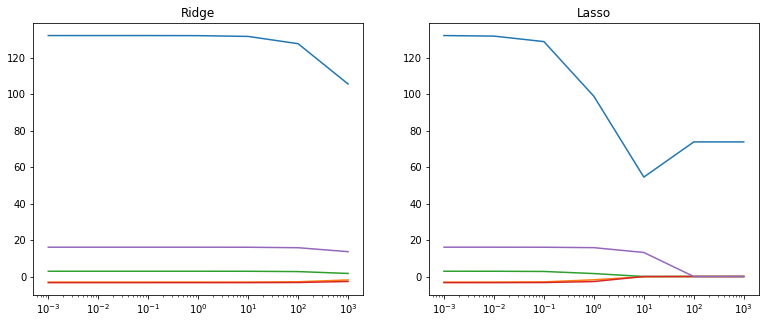

In [16]:
plt.figure(figsize=(13,5))

ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha)
plt.title("Ridge")

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha)
plt.title("Lasso")

plt.show()